In [2]:
# Importing some important libraries
from rdkit import Chem
import rdkit
import pandas as pd
from types import NoneType
from IPython.utils import io

In [3]:
# Reading an archive .sdf in python
dsMol = Chem.SDMolSupplier('structures.sdf')

In [13]:
DB_ID = []
SMILES_Struct = []
Mol_wheight = []
Chem_LogP = []
Acceptors_Num = []
Donors_Num = []
Formula = []
Rotatables_Count = []
Rings_Num = []
Total_PSA = []
index_list = []

column_names = ["DataBase ID",
                "SMILES",
                "Mol Weight",
                "Chemical LogP",
                "Acceptors Number",
                "Donors Number",
                "Formula",
                "Rotatables Count",
                "Rings Number",
                "Total PSA"]

In [16]:
# %%capture
#
# Adicionar outras listas além do Atom_list
#

def myFunction():
    with io.capture_output() as captured:
        if type(dsMol[x]) != NoneType:
            DB_ID.append(dsMol[x].GetProp("DATABASE_ID"))
            SMILES_Struct.append(dsMol[x].GetProp("SMILES"))
            Mol_wheight.append(dsMol[x].GetProp("MOLECULAR_WEIGHT"))
            Chem_LogP.append(dsMol[x].GetProp("JCHEM_LOGP"))
            Acceptors_Num.append(dsMol[x].GetProp("JCHEM_ACCEPTOR_COUNT"))
            Donors_Num.append(dsMol[x].GetProp("JCHEM_DONOR_COUNT"))
            Formula.append(dsMol[x].GetProp("FORMULA"))
            Rotatables_Count.append(dsMol[x].GetProp("JCHEM_ROTATABLE_BOND_COUNT"))
            Rings_Num.append(dsMol[x].GetProp("JCHEM_NUMBER_OF_RINGS"))
            Total_PSA.append(dsMol[x].GetProp("JCHEM_POLAR_SURFACE_AREA"))      
        else:
        # print(x, type(dsMol[x]))
            pass

index_guide = 0

for x in range(len(dsMol)):
    try:
        myFunction()
        if myFunction():
            index_list.append(index_guide)
            index_guide += 1 
    except: 
        print(f"O elemento num {x} não tem um dos elementos mandatórios")
        
        

O elemento num 825 não tem um dos elementos mandatórios
O elemento num 994 não tem um dos elementos mandatórios
O elemento num 1037 não tem um dos elementos mandatórios
O elemento num 1038 não tem um dos elementos mandatórios
O elemento num 1064 não tem um dos elementos mandatórios
O elemento num 1317 não tem um dos elementos mandatórios
O elemento num 1744 não tem um dos elementos mandatórios
O elemento num 1758 não tem um dos elementos mandatórios
O elemento num 1963 não tem um dos elementos mandatórios
O elemento num 2595 não tem um dos elementos mandatórios
O elemento num 38276 não tem um dos elementos mandatórios


In [ ]:
index_list

In [8]:
type(dsMol[994])


rdkit.Chem.rdchem.Mol

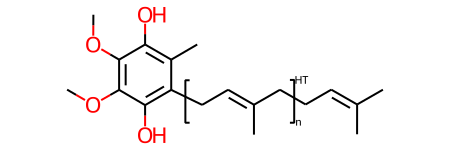

In [9]:
dsMol[994]

In [10]:
df1 = pd.DataFrame(index = index_list, data = Atom_list, columns= column_names)
print(df1)

NameError: name 'Atom_list' is not defined

In [ ]:
m.GetProp("DATABASE_ID")
m.GetProp("SMILES")
m.GetProp("MOLECULAR_WEIGHT")
m.GetProp("JCHEM_LOGP")
m.GetProp("JCHEM_ACCEPTOR_COUNT")
m.GetProp("JCHEM_DONOR_COUNT")
m.GetProp("FORMULA")
m.GetProp("JCHEM_ROTATABLE_BOND_COUNT")
m.GetProp("JCHEM_NUMBER_OF_RINGS")
m.GetProp("JCHEM_POLAR_SURFACE_AREA")

'81.14000000000001'

In [ ]:
m = dsMol[700]
m.GetPropsAsDict()

In [ ]:
GetAtomicNum(dsMol[0].get())